In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE

#Importing necessary libraries

In [12]:
df=pd.read_csv("D:/Data/Spring23/AppliedML-JP/401K.csv")

In [13]:
df.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.1,0.21,1653,6322,8,8709.0,0,9.072112
1,100.0,1.42,262,262,6,315.0,1,5.752573
2,97.6,0.91,166,170,10,275.0,1,5.616771
3,100.0,0.42,257,257,7,500.0,0,6.214608
4,82.5,0.53,591,716,28,933.0,1,6.838405


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   prate    1534 non-null   float64
 1   mrate    1534 non-null   float64
 2   totpart  1534 non-null   int64  
 3   totelg   1534 non-null   int64  
 4   age      1534 non-null   int64  
 5   totemp   1534 non-null   float64
 6   sole     1534 non-null   int64  
 7   ltotemp  1534 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 96.0 KB


In [15]:
df.isna().sum()

prate      0
mrate      0
totpart    0
totelg     0
age        0
totemp     0
sole       0
ltotemp    0
dtype: int64

There are no null values in the dataset and there are no categorical columns in the dataset

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
prate,1534.0,87.362907,16.716537,3.000000,78.02500,95.700000,100.000000,100.00000
mrate,1534.0,0.731512,0.779539,0.010000,0.30000,0.460000,0.830000,4.91000
totpart,1534.0,1354.230769,4629.264665,50.000000,156.25000,276.000000,749.500000,58811.00000
totelg,1534.0,1628.534550,5370.719356,51.000000,176.00000,330.000000,890.500000,70429.00000
age,1534.0,13.181226,9.171114,4.000000,7.00000,9.000000,18.000000,51.00000
totemp,1534.0,3567.321382,11199.875376,58.000000,261.00000,588.000000,1804.000000,140000.00000
sole,1534.0,0.487614,0.500010,0.000000,0.00000,0.000000,1.000000,1.00000
ltotemp,1534.0,6.686034,1.453375,4.060443,5.56452,6.376726,7.497762,11.88025


In [17]:
df.sort_values('prate',ascending=False)

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
767,100.0,0.12,404,404,7,664.0,0,6.498282
888,100.0,0.32,408,408,8,548.0,0,6.306275
861,100.0,1.94,193,193,25,193.0,1,5.262690
866,100.0,3.74,340,340,7,1750.0,1,7.467371
868,100.0,2.00,188,188,13,195.0,1,5.273000
...,...,...,...,...,...,...,...,...
526,19.3,0.54,51,264,25,290.0,0,5.669881
1450,17.4,0.29,265,1524,5,1549.0,0,7.345365
1271,14.9,0.22,1011,6801,7,9188.0,1,9.125653
938,8.8,0.50,142,1605,14,2215.0,0,7.703008


In [5]:
q1=df.prate.quantile(0.25)
q3=df.prate.quantile(0.75)
q1-(1.5*(q3-q1))

45.062500000000014

In [18]:
df=df[df.prate>45.0625]

C:\Users\abbie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prate'>

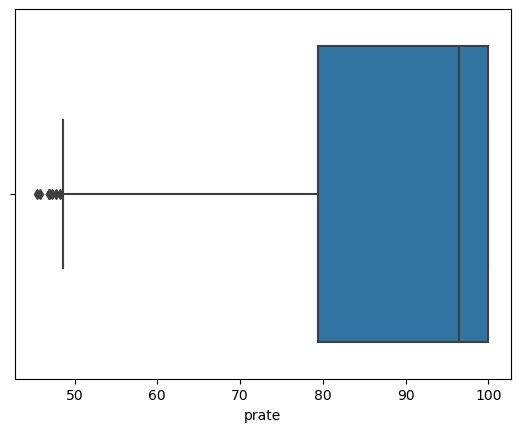

In [19]:
sns.boxplot(df.prate)

<AxesSubplot:xlabel='age', ylabel='prate'>

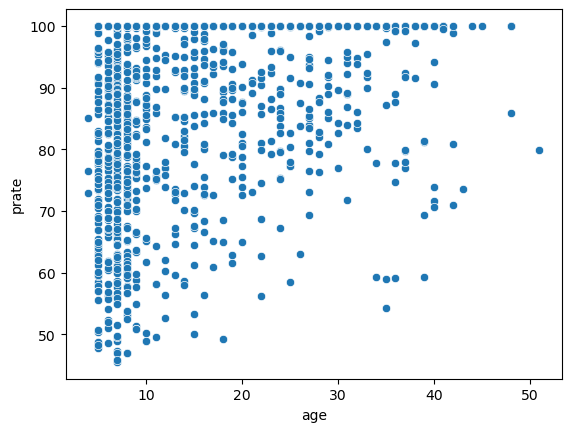

In [21]:
sns.scatterplot(y=df.prate,x=df.age)

<AxesSubplot:>

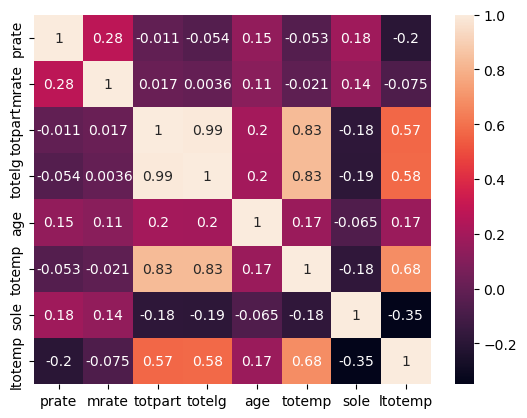

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
df.corr()['prate'].sort_values(ascending=False)

prate      1.000000
mrate      0.275895
sole       0.183290
age        0.145701
totpart   -0.010939
totemp    -0.053157
totelg    -0.054028
ltotemp   -0.197878
Name: prate, dtype: float64

None of the variables are highly correlated to prate

In [24]:
df.columns

Index(['prate', 'mrate', 'totpart', 'totelg', 'age', 'totemp', 'sole',
       'ltotemp'],
      dtype='object')

# OLS Regression

In [25]:
 X=df.drop(['prate'],axis=1)
y=df['prate']

In [31]:
X=sm.add_constant(X)
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     60.51
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.31e-76
Time:                        22:28:03   Log-Likelihood:                -5873.9
No. Observations:                1492   AIC:                         1.176e+04
Df Residuals:                    1484   BIC:                         1.181e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.1631      2.245     42.829      0.0

In [69]:
mod = smf.ols('prate~mrate+totpart+totelg+age+totemp+sole+ltotemp',df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  prate   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     60.51
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.31e-76
Time:                        20:23:12   Log-Likelihood:                -5873.9
No. Observations:                1492   AIC:                         1.176e+04
Df Residuals:                    1484   BIC:                         1.181e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.1631      2.245     42.829      0.000      91.759     100.567
mrate          3.6631      0.421      8.699      0.000       2.837       4.489
totpart        0.0063      0.001     12.008      0.000       0.005       0.007
totelg        -0.0055      0.000    -11.972      0.000      -0.006      -0.005
age            0.2148      0.036      5.953      0.000       0.144       0.286
totemp         0.0001   5.86e-05      1.842      0.066   -7.01e-06       0.000
sole           2.4874      0.697      3.566      0.000       1.119       3.856
ltotemp       -2.1565      0.322     -6.691      0.000      -2.789      -1.524
==============================================================================
Omnibus:                      193.591   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.270
Skew:                          -1.014   Prob(JB):                     1.24e-59
Kurtosis:                       3.504   Cond. No.                     9.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg0 = LinearRegression().fit(X, y)

In [39]:
reg0.coef_
print(reg0.coef_)

reg0.intercept_
print(reg0.intercept_)

reg0.predict(X)
print(reg0.predict(X))

[ 0.00000000e+00  3.66311148e+00  6.27718744e-03 -5.46498874e-03
  2.14754230e-01  1.07841433e-04  2.48742855e+00 -2.15650016e+00]
96.16311577656653
[92.98202953 92.16157194 86.06575485 ... 97.22655192 87.98601456
 87.6829581 ]


# Selecting Important Features for the model

In [46]:
selector = RFE(LinearRegression(), n_features_to_select=3, step=1)
selector = selector.fit(X, y)

In [47]:
selector.support_
print (selector.support_)

selector.ranking_
print(selector.ranking_)

selector.score(X,y)
print(selector.score(X,y))

selector = RFE(LinearRegression(), n_features_to_select=3, step=1)
selector = selector.fit(X, y)

selector.support_
print(selector.support_)

selector.ranking_
print(selector.ranking_)

selector.score(X,y)
print(selector.score(X,y))

[False  True False False False False  True  True]
[6 1 3 4 2 5 1 1]
0.11570290832548324
[False  True False False False False  True  True]
[6 1 3 4 2 5 1 1]
0.11570290832548324


# KNN regression

In [84]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [85]:
neigh.score(X,y)

0.9080353457255131

In [86]:
models = [KNeighborsRegressor(n_neighbors=i) for i in range(1,10)]
[model.fit(X,y).score(X,y) for model in models]

[1.0,
 0.9080353457255131,
 0.867831728794993,
 0.835683577730012,
 0.8101065742874378,
 0.791620794845182,
 0.7717619499108106,
 0.7537122354650031,
 0.7330717112955162]

In [49]:
from sklearn import linear_model

In [50]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)

Lasso(alpha=0.1)

In [53]:
clf.coef_
print(clf.coef_)

clf.intercept_
print(clf.intercept_)

np.abs(clf.coef_).sum()

[ 0.00000000e+00  3.53542920e+00  6.31124721e-03 -5.49717198e-03
  2.13879865e-01  1.03105493e-04  2.11939508e+00 -2.12666289e+00]
96.27167487785465


8.007278559669253

In [54]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [55]:
lm.coef_
print(lm.coef_)

lm.intercept_
print(lm.intercept_)

np.abs(lm.coef_).sum()
print(np.abs(lm.coef_).sum())

lm.predict(X)
print(lm.predict(X))

lm.predict(X).mean()
print(lm.predict(X).mean())

clf = linear_model.LassoCV()
clf.fit(X,y)

clf.coef_
print(clf.coef_)

clf.intercept_
print(clf.intercept_)



[ 0.00000000e+00  3.66311148e+00  6.27718744e-03 -5.46498874e-03
  2.14754230e-01  1.07841433e-04  2.48742855e+00 -2.15650016e+00]
96.16311577656653
8.533644442535323
[92.98202953 92.16157194 86.06575485 ... 97.22655192 87.98601456
 87.6829581 ]
88.89919571045577
[ 0.00000000e+00  0.00000000e+00  7.18236721e-03 -6.22277371e-03
  1.24477259e-01 -1.10241649e-04  0.00000000e+00 -0.00000000e+00]
87.66406136974771


In [56]:
clf.mse_path_

array([[206.34224567, 169.29534067, 229.41287708, 168.35296935,
        218.37531524],
       [206.28433801, 169.31484163, 229.34639916, 168.37589782,
        218.37531524],
       [206.22268544, 169.33425463, 229.28628557, 168.40678238,
        218.37531524],
       [206.16666164, 169.35342586, 229.23261812, 168.44384923,
        218.37531524],
       [206.11569531, 169.3722327 , 229.18465045, 168.48560536,
        218.37531524],
       [206.06927866, 169.39057888, 229.14172712, 168.53079855,
        218.37531524],
       [206.02695986, 169.40839034, 229.10327223, 168.5783829 ,
        218.37531524],
       [205.98833644, 169.42561172, 229.06877939, 168.62748909,
        218.37531524],
       [205.95304953, 169.44220329, 229.03780309, 168.67739862,
        218.37531524],
       [205.92077871, 169.45813835, 229.00995109, 168.72752162,
        218.37531524],
       [205.89123764, 169.47340101, 228.9848778 , 168.77737777,
        218.33640348],
       [205.86417007, 169.48798429, 228.962

In [57]:
clf.mse_path_.mean(1)

array([198.35574961, 198.33935837, 198.32506465, 198.31437402,
       198.30669981, 198.30153969, 198.29846411, 198.29710638,
       198.29715395, 198.298341  , 198.29265954, 198.26641872,
       198.24346009, 198.2233653 , 198.20576986, 198.19035617,
       198.17684748, 198.16500258, 198.16152112, 198.16663059,
       198.18449675, 198.20676574, 198.22988292, 198.19087469,
       197.81612075, 197.19825193, 195.44081109, 192.98339859,
       190.85764411, 189.02255273, 187.43848833, 186.07090862,
       184.89132492, 183.87359468, 182.9949309 , 182.2408225 ,
       181.59401555, 181.04008431, 180.56619716, 180.161188  ,
       179.81590872, 179.52191641, 179.27218049, 179.06037184,
       178.8813131 , 178.73031865, 178.60348108, 178.49731795,
       178.40884604, 178.33549444, 178.27506845, 178.22570549,
       178.18564845, 178.15357557, 178.12822104, 178.10856054,
       178.09364092, 178.08277353, 178.07526191, 178.07053666,
       178.06815914, 178.06758612, 178.0685827 , 178.07

In [59]:
clf.mse_path_.mean(1).argmin()
print(clf.mse_path_.mean(1).argmin())

clf.alpha_
print(clf.alpha_)

clf.alphas_[clf.mse_path_.mean(1).argmin()]
print(clf.alphas_[clf.mse_path_.mean(1).argmin()])

clf.predict(X)
print(clf.predict(X))

clf.predict(X).mean()
print(clf.predict(X).mean())

lm.predict(X).mean()
print(lm.predict(X).mean())

clf.predict(X).var()
print(clf.predict(X).var())

lm.predict(X).var()
print(lm.predict(X).var())

99
8.307635784056528
8.307635784056528
[88.6276123  89.01291893 88.72689689 ... 93.63152709 88.71653699
 92.3911297 ]
88.89919571045577
88.89919571045577
22.273881864672433
43.912954832607376


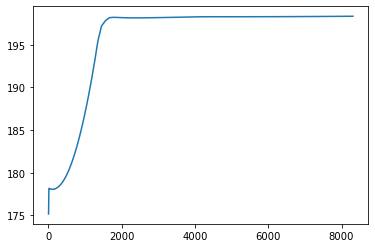

In [111]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

# Lasso Regression

In [63]:
clf = linear_model.LassoCV(alphas=np.linspace(0.00001,0.01,200))
clf.fit(X,y)

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.32117365050362, tolerance: 22.686908261306527
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=array([1.00000000e-05, 6.02010050e-05, 1.10402010e-04, 1.60603015e-04,
       2.10804020e-04, 2.61005025e-04, 3.11206030e-04, 3.61407035e-04,
       4.11608040e-04, 4.61809045e-04, 5.12010050e-04, 5.62211055e-04,
       6.12412060e-04, 6.62613065e-04, 7.12814070e-04, 7.63015075e-04,
       8.13216080e-04, 8.63417085e-04, 9.13618090e-04, 9.63819095e-04,
       1.01402010e-03, 1.06422111e-0...
       8.84537688e-03, 8.89557789e-03, 8.94577889e-03, 8.99597990e-03,
       9.04618090e-03, 9.09638191e-03, 9.14658291e-03, 9.19678392e-03,
       9.24698492e-03, 9.29718593e-03, 9.34738693e-03, 9.39758794e-03,
       9.44778894e-03, 9.49798995e-03, 9.54819095e-03, 9.59839196e-03,
       9.64859296e-03, 9.69879397e-03, 9.74899497e-03, 9.79919598e-03,
       9.84939698e-03, 9.89959799e-03, 9.94979899e-03, 1.00000000e-02]))

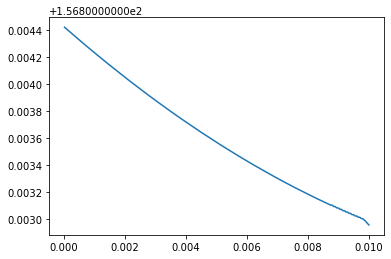

In [113]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [64]:
clf.alpha_
print(clf.alpha_)

clf.coef_
print(clf.coef_)

lm.coef_
print(lm.coef_)

0.01
[ 0.00000000e+00  3.65034326e+00  6.28059331e-03 -5.46820698e-03
  2.14666794e-01  1.07367841e-04  2.45062521e+00 -2.15351644e+00]
[ 0.00000000e+00  3.66311148e+00  6.27718744e-03 -5.46498874e-03
  2.14754230e-01  1.07841433e-04  2.48742855e+00 -2.15650016e+00]


# Ridge Regression

In [61]:
clf = Ridge(alpha=1.0)
clf.fit(X,y)

Ridge()

In [65]:
clf.coef_
print(clf.coef_)

clf.intercept_
print(clf.intercept_)

lm.coef_
print(lm.coef_)

lm.intercept_
print(lm.intercept_)

clf.predict(X)
print(clf.predict(X))

clf.predict(X).mean()
print(clf.predict(X).mean())

lm.predict(X).mean()
print(lm.predict(X).mean())

clf.predict(X).var()
print(clf.predict(X).var())

lm.predict(X).var()
print(lm.predict(X).var())

[ 0.00000000e+00  3.65034326e+00  6.28059331e-03 -5.46820698e-03
  2.14666794e-01  1.07367841e-04  2.45062521e+00 -2.15351644e+00]
96.1739717056931
[ 0.00000000e+00  3.66311148e+00  6.27718744e-03 -5.46498874e-03
  2.14754230e-01  1.07841433e-04  2.48742855e+00 -2.15650016e+00]
96.16311577656653
[92.95449069 92.13977801 86.08899016 ... 97.22762109 87.97194982
 87.70893859]
88.89919571045577
88.89919571045577
43.7428063974858
43.912954832607376


In [66]:
clf = linear_model.RidgeCV(alphas=np.linspace(0.1,500,1000),store_cv_values=True,cv=None)
clf.fit(X,y)

RidgeCV(alphas=array([1.00000000e-01, 6.00400400e-01, 1.10080080e+00, 1.60120120e+00,
       2.10160160e+00, 2.60200200e+00, 3.10240240e+00, 3.60280280e+00,
       4.10320320e+00, 4.60360360e+00, 5.10400400e+00, 5.60440440e+00,
       6.10480480e+00, 6.60520521e+00, 7.10560561e+00, 7.60600601e+00,
       8.10640641e+00, 8.60680681e+00, 9.10720721e+00, 9.60760761e+00,
       1.01080080e+01, 1.06084084e+0...
       4.88490791e+02, 4.88991191e+02, 4.89491592e+02, 4.89991992e+02,
       4.90492392e+02, 4.90992793e+02, 4.91493193e+02, 4.91993594e+02,
       4.92493994e+02, 4.92994394e+02, 4.93494795e+02, 4.93995195e+02,
       4.94495596e+02, 4.94995996e+02, 4.95496396e+02, 4.95996797e+02,
       4.96497197e+02, 4.96997598e+02, 4.97497998e+02, 4.97998398e+02,
       4.98498799e+02, 4.98999199e+02, 4.99499600e+02, 5.00000000e+02]),
        store_cv_values=True)

In [67]:
clf.coef_
print(clf.coef_)

clf.intercept_
print(clf.intercept_)

clf.alpha_
print(clf.alpha_)

lm.coef_
print(lm.coef_)

lm.intercept_
print(lm.intercept_)

clf.predict(X)
print(clf.predict(X))

clf.predict(X).mean()
print(clf.predict(X).mean())

lm.predict(X).mean()
print(lm.predict(X).mean())

clf.predict(X).var()
print(clf.predict(X).var())

lm.predict(X).var()
print(lm.predict(X).var())

[ 0.00000000e+00  3.53116725e+00  6.30310274e-03 -5.48860180e-03
  2.15513176e-01  1.05187457e-04  2.27982354e+00 -2.14464076e+00]
96.28469880050693
38.63083083083083
[ 0.00000000e+00  3.66311148e+00  6.27718744e-03 -5.46498874e-03
  2.14754230e-01  1.07841433e-04  2.48742855e+00 -2.15650016e+00]
96.16311577656653
[92.78118963 92.02923954 86.2102001  ... 97.16497663 87.9085217
 87.85560707]
88.89919571045577
88.89919571045577
42.732539053884054
43.912954832607376


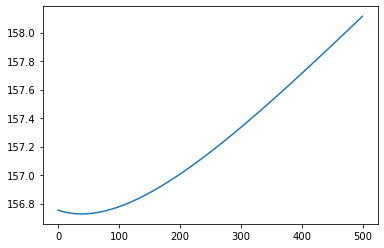

In [139]:
plt.plot(np.linspace(0.1,500,1000),clf.cv_values_.mean(0))

# Elastic Regression

In [68]:
clf = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)
clf.fit(X, y)

ElasticNet(alpha=0.1)

In [69]:
clf.coef_
print(clf.coef_)

lm.coef_
print(lm.coef_)

clf.intercept_
print(clf.intercept_)

lm.intercept_
print(lm.intercept_)


[ 0.00000000e+00  3.35396551e+00  6.34199288e-03 -5.52409277e-03
  2.15722827e-01  9.98903912e-05  1.97069221e+00 -2.10978392e+00]
[ 0.00000000e+00  3.66311148e+00  6.27718744e-03 -5.46498874e-03
  2.14754230e-01  1.07841433e-04  2.48742855e+00 -2.15650016e+00]
96.35397761064738
96.16311577656653


In [70]:
clf = linear_model.ElasticNetCV(alphas=np.linspace(0.0001,0.01,500))
clf.fit(X, y)

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.7406023304502, tolerance: 22.686908261306527
  model = cd_fast.enet_coordinate_descent_gram(


ElasticNetCV(alphas=array([0.0001    , 0.00011984, 0.00013968, 0.00015952, 0.00017936,
       0.0001992 , 0.00021904, 0.00023888, 0.00025872, 0.00027856,
       0.0002984 , 0.00031824, 0.00033808, 0.00035792, 0.00037776,
       0.0003976 , 0.00041743, 0.00043727, 0.00045711, 0.00047695,
       0.00049679, 0.00051663, 0.00053647, 0.00055631, 0.00057615,
       0.00059599, 0.00061583, 0.00063567, 0.00065551, 0.00067535,...
       0.00932545, 0.00934529, 0.00936513, 0.00938497, 0.00940481,
       0.00942465, 0.00944449, 0.00946433, 0.00948417, 0.00950401,
       0.00952385, 0.00954369, 0.00956353, 0.00958337, 0.00960321,
       0.00962305, 0.00964289, 0.00966273, 0.00968257, 0.0097024 ,
       0.00972224, 0.00974208, 0.00976192, 0.00978176, 0.0098016 ,
       0.00982144, 0.00984128, 0.00986112, 0.00988096, 0.0099008 ,
       0.00992064, 0.00994048, 0.00996032, 0.00998016, 0.01      ]))

In [71]:
clf.coef_
print(clf.coef_)

lm.coef_
print(lm.coef_)

clf.intercept_
print(clf.intercept_)

clf.alpha_
print(clf.alpha_)

[ 0.00000000e+00  3.63066172e+00  6.28401260e-03 -5.47128767e-03
  2.14861677e-01  1.07116600e-04  2.42572075e+00 -2.15318203e+00]
[ 0.00000000e+00  3.66311148e+00  6.27718744e-03 -5.46498874e-03
  2.14754230e-01  1.07841433e-04  2.48742855e+00 -2.15650016e+00]
96.19701615573996
0.01


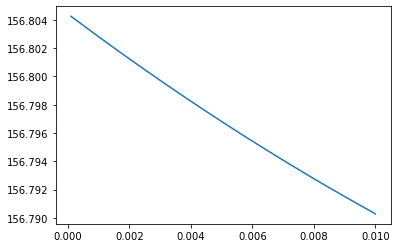

In [150]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [151]:
from sklearn.preprocessing import scale 

clf = linear_model.Lars(n_nonzero_coefs=3,normalize=False)
clf.fit(scale(X), y)

Lars(n_nonzero_coefs=3, normalize=False)

In [72]:
clf.coef_
print(clf.coef_)

clf.intercept_
print(clf.intercept_)

lm.fit(scale(X),y)

lm.coef_
print(lm.coef_)

lm.intercept_
print(lm.intercept_)

clf = linear_model.LarsCV(normalize=False)
clf.fit(scale(X), y)

clf.coef_
print(clf.coef_)

lm.coef_
print(lm.coef_)

clf.score(scale(X),y)
print(clf.score(scale(X),y))

lm.score(scale(X),y)
print(lm.score(scale(X),y))

[ 0.00000000e+00  3.63066172e+00  6.28401260e-03 -5.47128767e-03
  2.14861677e-01  1.07116600e-04  2.42572075e+00 -2.15318203e+00]
96.19701615573996
[  0.           2.87106371  29.43676077 -29.28796093   1.9772348
   1.19846575   1.2433913   -3.12246308]
88.89919571045577
[  0.           2.87106371  29.43676077 -29.28796093   1.9772348
   1.19846575   1.2433913   -3.12246308]
[  0.           2.87106371  29.43676077 -29.28796093   1.9772348
   1.19846575   1.2433913   -3.12246308]
0.22204589969133492
0.2220458996913348


# PCA 

Text(0.5, 1.0, 'hp')

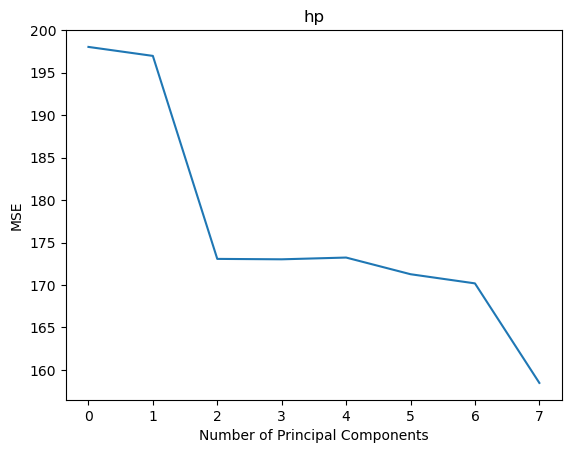

In [73]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = linear_model.LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')


In [74]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 48.53,  65.42,  79.15,  90.41,  97.31,  99.88, 100.01, 100.01])

In [166]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:2]

#train PCR model on training data 
regr = linear_model.LinearRegression()
regr.fit(X_reduced_train[:,:2], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

12.769798095990316